# Tutorial: Transforming Data with Cocoon into a Common Data Model

This tutorial will guide you through the process of using Cocoon for automated documentation, cleansing, and transformation of data into a common data model. We will be working with synthetic patient data provided by Synthea.

## Installation of Cocoon and Configuration of OpenAI API Key

To install Cocoon, please follow the instructions provided. Additionally, for obtaining the OpenAI API key, refer to the Cocoon's GitHub page at https://github.com/Cocoon-Data-Transformation/cocoon/tree/main#openai-api-key.


In [1]:
! pip install cocoon_data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.3/94.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [2]:
from cocoon_data import *

In [3]:
# set up your api key
openai.api_key = ""

# test if it works
response = openai.ChatCompletion.create(
    model="gpt-4-1106-preview",
    messages=[
      {"role": "user", "content": "hello!"},
  ]
)

print(response['choices'][0]['message']["content"])

Hello! How can I assist you today?


## Downloading Files and Starting Documentation

Begin by downloading the required files. The documentation process is interactive and should take only a few minutes.


In [7]:
import requests

# Dictionary of file names and their URLs
files = {
    "patients.csv": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients.csv",
    "patients_docu.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_docu.json",
    "patients_transformer.json": "https://raw.githubusercontent.com/Cocoon-Data-Transformation/cocoon/main/files/patients_transformer.json"
}

# Loop through the files dictionary
for file_name, url in files.items():
    # Send a GET request to the URL
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Open file in binary write mode
        with open(file_name, "wb") as file:
            file.write(response.content)
        print(f"{file_name} downloaded successfully.")
    else:
        print(f"Failed to download {file_name}.")


patients.csv downloaded successfully.
patients_docu.json downloaded successfully.
patients_transformer.json downloaded successfully.


In [8]:
# path to your csv file
file_path = "./patients.csv"

# create a pandas dataframe from the csv file
df = pd.read_csv(file_path)

In [11]:
# pass the dataframe and the table name to the cocoon documenter
cocoon_documenter = DocumentedData(df, table_name="patients")

# optionally, you can load past documentat
# cocoon_documenter.read_document_from_disk('./patients_docu.json')

Congratulation! The document is complete. 🎉

What's next?
1. Use Cleaner 🧹 to clean the data.
2. Use Standardizer 📏 to standardize the data.
3. Use Transformer 🔌 to transform the data.      
...

And more to come! 🚀


In [10]:
# start documenting your data
# if there is an error, please try to rerun this cell
cocoon_documenter.start_document()

Button(description='Submit', style=ButtonStyle(), tooltip='Submit')

In [ ]:
# remember to save the document to disk, so you can load it later
# cocoon_documenter.write_document_to_disk('./patients_docu.json')

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,MAIDEN_NAME,MARITAL_STATUS,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,FIPS_CODE,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel236,Bailey598,NaN,NaN,NaN,white,nonhispanic,M,Norton Center Massachusetts US,716 Wunsch Gardens Unit 48,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne169,Marks830,NaN,Lowe577,M,white,nonhispanic,F,Longmeadow Massachusetts US,123 Bayer Camp,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter736,Keebler762,NaN,NaN,NaN,white,nonhispanic,M,Maynard Massachusetts US,575 Jast Rue Unit 48,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel574,Ernser583,NaN,NaN,NaN,asian,nonhispanic,M,Somerville Massachusetts US,184 Langworth Parade Apt 10,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey714,Heathcote539,NaN,Hegmann834,M,white,nonhispanic,F,Natick Massachusetts US,801 Morissette Divide,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420

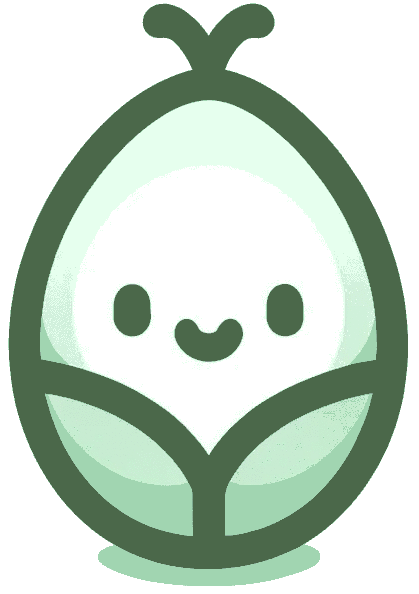

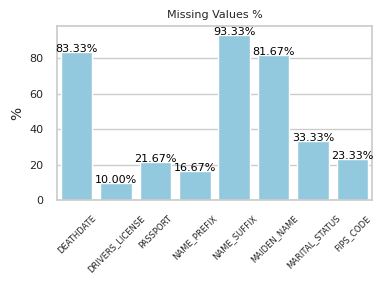

In [12]:
# display the document
cocoon_documenter

In [13]:
# save the document as html
cocoon_documenter.save_as_html('./patients.html')

## Data Cleaning Process

As you go through the documentation, various issues will be identified. Now, let's engage in an interactive data cleaning process to resolve these issues and establish a data pipeline.


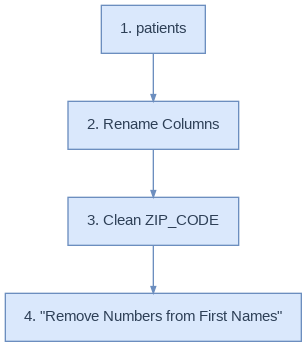

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,FIPS,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel236,Bailey598,NaN,NaN,NaN,white,nonhispanic,M,Norton Center Massachusetts US,716 Wunsch Gardens Unit 48,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne169,Marks830,NaN,Lowe577,M,white,nonhispanic,F,Longmeadow Massachusetts US,123 Bayer Camp,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter736,Keebler762,NaN,NaN,NaN,white,nonhispanic,M,Maynard Massachusetts US,575 Jast Rue Unit 48,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel574,Ernser583,NaN,NaN,NaN,asian,nonhispanic,M,Somerville Massachusetts US,184 Langworth Parade Apt 10,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey714,Heathcote539,NaN,Hegmann834,M,white,nonhispanic,F,Natick Massachusetts US,801 Morissette Divide,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420


Done


In [14]:
# clean the data
cocoon_cleaner = DataCleaning(cocoon_documenter)
cocoon_cleaner

In [ ]:
# inspect the cleaning pipeline
cocoon_cleaner.pipeline

In [15]:
# run the cleaning codes and return the cleaned dataframe
cleaned_df = cocoon_cleaner.run_codes()
cleaned_df

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS_LICENSE,PASSPORT,NAME_PREFIX,FIRST_NAME,LAST_NAME,NAME_SUFFIX,MAIDEN_NAME,MARITAL_STATUS,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,FIPS_CODE,ZIP_CODE,LATITUDE,LONGITUDE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,INCOME
0,eb247227-e839-88d3-447d-b5972468f33b,2021-09-23,NaN,999-41-1756,NaN,NaN,NaN,Mel,Bailey598,NaN,NaN,NaN,white,nonhispanic,M,Norton Center Massachusetts US,716 Wunsch Gardens Unit 48,Framingham,Massachusetts,Middlesex County,25017.0,1701,42.275650,-71.476367,2520.80,4323.64,170754
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944-05-31,NaN,999-33-4589,S99957814,X45639058X,Mrs.,Cheyenne,Marks830,NaN,Lowe577,M,white,nonhispanic,F,Longmeadow Massachusetts US,123 Bayer Camp,Taunton,Massachusetts,Bristol County,25005.0,2718,41.892884,-71.066686,205342.20,94647.00,40526
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009-02-08,NaN,999-59-2568,NaN,NaN,NaN,Hunter,Keebler762,NaN,NaN,NaN,white,nonhispanic,M,Maynard Massachusetts US,575 Jast Rue Unit 48,Winchendon,Massachusetts,Worcester County,25027.0,1475,42.670059,-72.074664,16381.92,17447.87,79884
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979-06-26,1995-07-04,999-77-7700,S99968506,NaN,NaN,Herschel,Ernser583,NaN,NaN,NaN,asian,nonhispanic,M,Somerville Massachusetts US,184 Langworth Parade Apt 10,Boston,Massachusetts,Suffolk County,25025.0,2131,42.395516,-71.059015,3850.00,44057.32,6420
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973-05-31,NaN,999-29-2359,S99967405,X86891718X,Mrs.,Lacey,Heathcote539,NaN,Hegmann834,M,white,nonhispanic,F,Natick Massachusetts US,801 Morissette Divide,Hingham,Massachusetts,Plymouth County,25023.0,2043,42.200723,-70.836590,66662.10,1777031.06,933420
5,7ec76836-c039-d9bf-8bb9-fe488c66d452,2003-01-13,NaN,999-42-9847,S99998925,NaN,Ms.,Adelia,Collier206,NaN,NaN,NaN,white,nonhispanic,F,Marshfield Massachusetts US,459 Larson Union,Boston,Massachusetts,Suffolk County,25025.0,2134,42.315506,-71.051696,4050.00,158604.59,1361
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998-12-14,NaN,999-49-9846,S99945605,X69843358X,Mr.,Hayden,Casper496,NaN,NaN,NaN,white,nonhispanic,M,Charlton Massachusetts US,589 Conroy Approach,Belmont,Massachusetts,Middlesex County,25017.0,2472,42.361539,-71.209136,40347.11,180076.32,51861
7,734e5f3c-e660-6cbe-7c26-c5264cbde68e,2005-03-03,NaN,999-71-8314,S99991875,NaN,NaN,Herb,Willms744,NaN,NaN,NaN,white,hispanic,M,Melrose Massachusetts US,980 Koss Plaza Apt 11,Brockton,Massachusetts,Plymouth County,25023.0,2302,42.111654,-71.025907,390568.25,0.00,35002
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983-02-18,NaN,999-95-3792,S99957390,X63804957X,Mr.,Stewart,Schimmel440,NaN,NaN,M,white,nonhispanic,M,Fall River Massachusetts US,843 Yost Spur Unit 81,Sharon,Massachusetts,Norfolk County,25021.0,2067,42.101473,-71.205475,7321.10,176776.70,10335
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998-10-30,NaN,999-44-2795,S99942670,X49037240X,Ms.,Jenae,Becker968,NaN,NaN,NaN,white,nonhispanic,F,Somerville Massachusetts US,248 Ernser Terrace Suite 86,Lynn,Massachusetts,Essex County,25009.0,1901,42.498504,-71.035824,34690.56,626729.36,56421


In [16]:
# print the cleaning codes
cocoon_cleaner.print_codes()

import pandas as pd
import numpy as np

df_0 = pd.read_csv(ADD_YOUR_SOURCE_FILE_PATH_HERE) 

# Rename columns in the DataFrame
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'FIPS_CODE',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    df.rename(columns=rename_map, inplace=True)
    return df

df_1 = transform(df_0)

# Clean column ZIP_CODE by removing the unusual rows that don't match the regex pattern
def transform(df):
    output_df = df.copy()

    # Transform the column to string type
    output_df["ZIP_CODE"] = output_df["ZIP_CODE"].astype(str)

    output_df = output_df[output_df["ZIP_CODE"].str.match(r"^[1-9][0-9]{3}$")]
    return output_df

df_2 = transform(df_1)

def transform(input_df):
    outp

## Transforming Data to Target Schema

Excellent, the data is now clean. The next step is to transform it into the common data model.

In [23]:
# pass the documenter to the cocoon transformer
cocoon_transformer = CDMTransformation(cocoon_cleaner)

# optionally, you can load past transformation
# cocoon_transformer.read_document_from_disk('./patients_transformer.json')

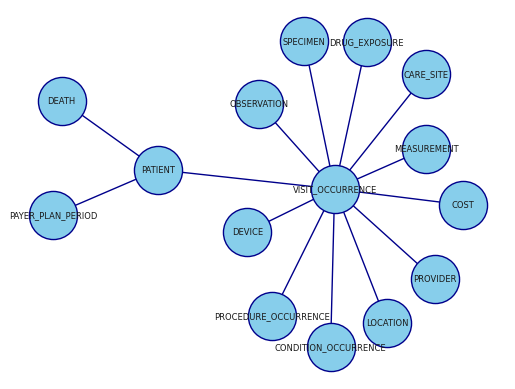

In [24]:
# print out the target tables
cocoon_transformer.display_database()

💻 Writing the codes...


IntProgress(value=1, max=7)

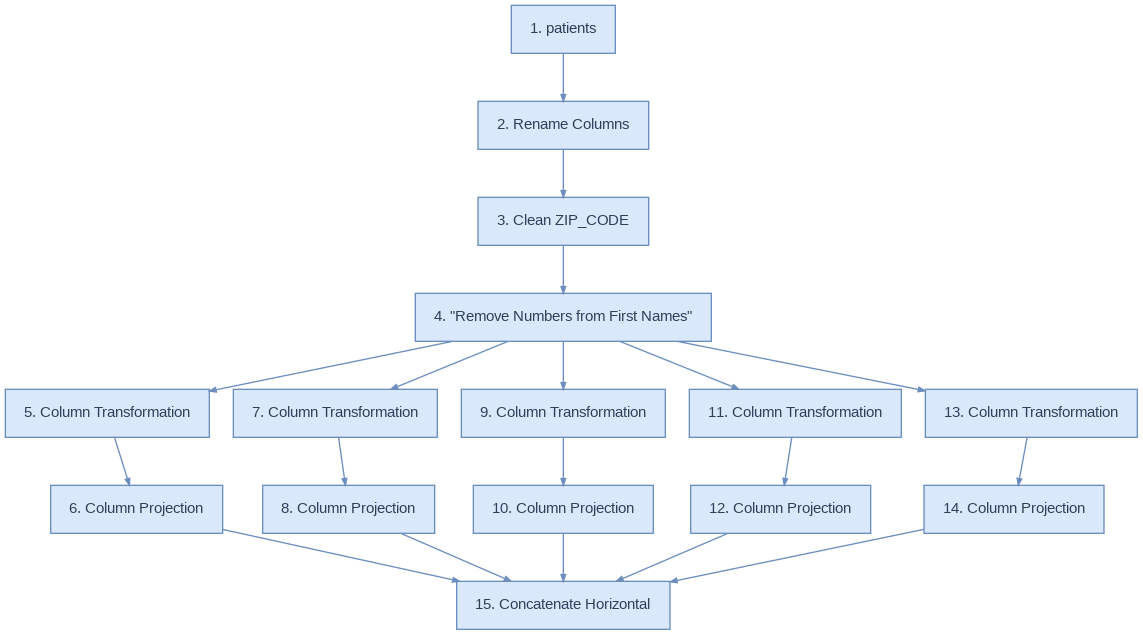

Dropdown(options=('1. patients', '2. Rename Columns', '3. Clean ZIP_CODE', '4. "Remove Numbers from First Name…

In [25]:
cocoon_transformer.start()

In [ ]:
# remember to save the transformation document to disk, so you can load it later
cocoon_transformer.write_document_to_disk('./patients_transformer.json')

In [26]:
# display the transformation codes
cocoon_transformer.pipeline.print_codes()

import pandas as pd
import numpy as np

df_0 = pd.read_csv(ADD_YOUR_SOURCE_FILE_PATH_HERE) 

# Rename columns in the DataFrame
def transform(df):
    rename_map = {
        'DRIVERS': 'DRIVERS_LICENSE',
        'PREFIX': 'NAME_PREFIX',
        'FIRST': 'FIRST_NAME',
        'LAST': 'LAST_NAME',
        'SUFFIX': 'NAME_SUFFIX',
        'MAIDEN': 'MAIDEN_NAME',
        'MARITAL': 'MARITAL_STATUS',
        'FIPS': 'FIPS_CODE',
        'ZIP': 'ZIP_CODE',
        'LAT': 'LATITUDE',
        'LON': 'LONGITUDE',
    }
    df.rename(columns=rename_map, inplace=True)
    return df

df_1 = transform(df_0)

# Clean column ZIP_CODE by removing the unusual rows that don't match the regex pattern
def transform(df):
    output_df = df.copy()

    # Transform the column to string type
    output_df["ZIP_CODE"] = output_df["ZIP_CODE"].astype(str)

    output_df = output_df[output_df["ZIP_CODE"].str.match(r"^[1-9][0-9]{3}$")]
    return output_df

df_2 = transform(df_1)

def transform(input_df):
    outp

In [27]:
# run the transformation codes and return the transformed dataframe
target_df = cocoon_transformer.run_codes()
target_df

,person_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,gender_concept_id,gender_source_value,race_concept_id,race_source_value,ethnicity_concept_id,ethnicity_source_value
0,eb247227-e839-88d3-447d-b5972468f33b,2021,9,23,2021-09-23,8507,M,8527,white,38003563,nonhispanic
1,2ffa361e-5858-877e-e022-ce81fe32da1b,1944,5,31,1944-05-31,8532,F,8527,white,38003563,nonhispanic
2,3dfb065a-67df-5b8a-3901-49bfd834bed1,2009,2,8,2009-02-08,8507,M,8527,white,38003563,nonhispanic
3,db80575b-5e9b-921b-fad9-1e3a20929dc7,1979,6,26,1979-06-26,8507,M,8515,asian,38003563,nonhispanic
4,d84815a3-c5b3-8ca2-025f-6323a4ec59ef,1973,5,31,1973-05-31,8532,F,8527,white,38003563,nonhispanic
5,7ec76836-c039-d9bf-8bb9-fe488c66d452,2003,1,13,2003-01-13,8532,F,8527,white,38003563,nonhispanic
6,79297a39-2d2d-d88d-5e47-7a521af1d69f,1998,12,14,1998-12-14,8507,M,8527,white,38003563,nonhispanic
7,734e5f3c-e660-6cbe-7c26-c5264cbde68e,2005,3,3,2005-03-03,8507,M,8527,white,38003564,hispanic
8,750cdaf4-c264-e967-e76b-53a5a61abcab,1983,2,18,1983-02-18,8507,M,8527,white,38003563,nonhispanic
9,285cba54-c91d-6db4-4d78-1ea35ba6b622,1998,10,30,1998-10-30,8532,F,8527,white,38003563,nonhispanic
